/var/folders/ps/813lbjvx1635f2y8z8gt5bn80000gn/T/ipykernel_3034/1168899084.py:30: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamp_format = str(datetime.utcfromtimestamp(timestamp))


Point 1, Latitude: 6.4135510302388, Longitude: -33.792621749875, Timestamp: 2025-07-02 10:37:49
Point 2, Latitude: 5.7531496383809, Longitude: -33.320046207149, Timestamp: 2025-07-02 10:38:02
Point 3, Latitude: 5.1939655226103, Longitude: -32.921134229999, Timestamp: 2025-07-02 10:38:13
Point 4, Latitude: 4.6344649742496, Longitude: -32.52300868089, Timestamp: 2025-07-02 10:38:24
Point 5, Latitude: 4.0237843199831, Longitude: -32.089488605563, Timestamp: 2025-07-02 10:38:36
Point 6, Latitude: 3.4128197661676, Longitude: -31.656696047532, Timestamp: 2025-07-02 10:38:48
Point 7, Latitude: 2.801612881065, Longitude: -31.224518399549, Timestamp: 2025-07-02 10:39:00
Point 8, Latitude: 2.1902132307046, Longitude: -30.792849240308, Timestamp: 2025-07-02 10:39:12
Point 9, Latitude: 1.5786620202792, Longitude: -30.361576673577, Timestamp: 2025-07-02 10:39:24
Point 10, Latitude: 1.0179803137217, Longitude: -29.966500029693, Timestamp: 2025-07-02 10:39:35
Point 11, Latitude: 0.45724771586115, Lon

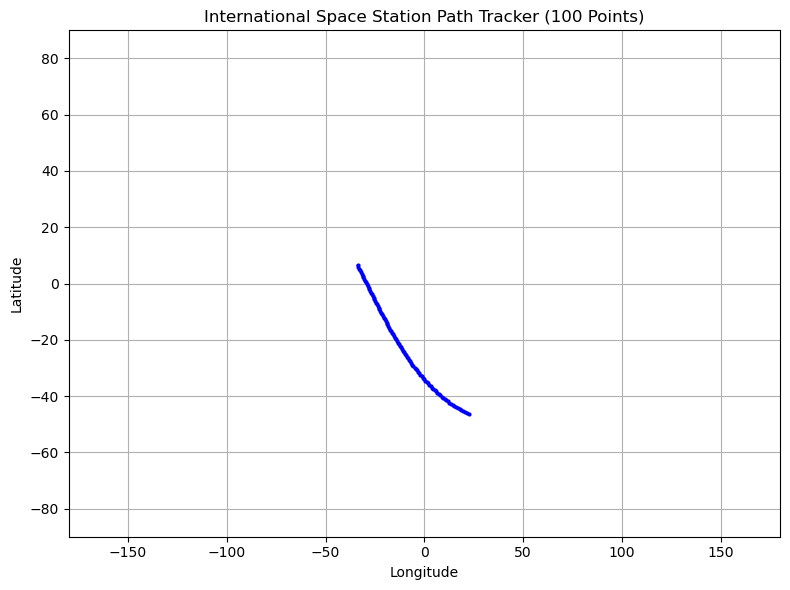

In [1]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime

latitudes = []
longitudes = []
timestamps = []

number_points = 100
interval = 10
points_list = [] 

for i in range(number_points):
    url = "https://api.wheretheiss.at/v1/satellites/25544"
    response = requests.get(url)
    data = response.json()

    latitude = data['latitude']
    longitude = data['longitude']
    timestamp = data['timestamp']

    latitudes.append(latitude)
    longitudes.append(longitude)
    timestamps.append(timestamp)

    point_number = i + 1
    lat_print = str(latitude)
    lon_print = str(longitude)
    timestamp_format = str(datetime.utcfromtimestamp(timestamp))

    point_details = 'Point ' + str(point_number) + ', Latitude: ' + lat_print + ', Longitude: ' + lon_print + ', Timestamp: ' + timestamp_format
    print(point_details)
    points_list.append(point_details)
  
    if i < number_points - 1:
        time.sleep(interval)

plt.figure(figsize=(8, 6))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue', markersize=2)
plt.title("International Space Station Path Tracker (100 Points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.grid(True)

all_points_text = "\n".join(points_list)

plt.tight_layout()
plt.show()